In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle
import plotly
import pandas as pd
# from functools import partial
import networkx as net
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots

ModuleNotFoundError: No module named 'plotly'

In [3]:
np.set_printoptions(suppress = True)

**Verify the  effect of the proposed adaptive consensus rate $\zeta^{(t)}$ by comparing its error and convergence results with those using constant consensus rate $\zeta^{(0)}$**

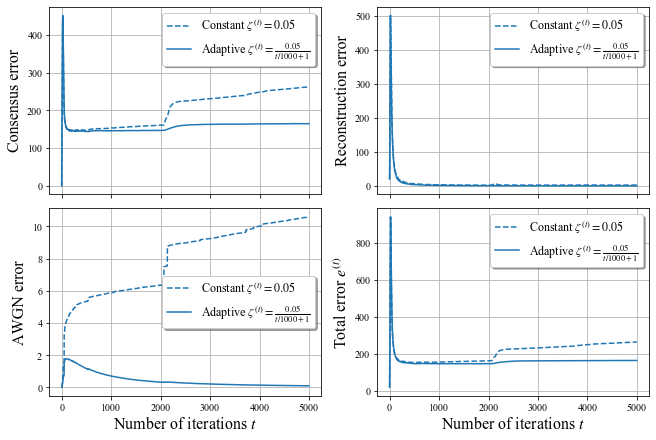

In [4]:
# The impact of constant consensus rate \zeta^{(0)} on different error terms
N = 7943
K = 20
d = 7850
M = 5
m = int(N/(2*M))
initial_cr = .05
# a_prime = 1000
PATH = '../repo_jv/data/simulations/'

plt.rc('font', family='Times New Roman')
mpl.rcParams["mathtext.fontset"] = 'stix'
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (9.0,6.0), sharex = True, constrained_layout=True) # draw up a 2-by-1 subplots
# The breakdown errors arising from consensus, compression, AWGN and all components in subplots
cons_errors = pickle.load( open('../repo_jv/data/simulations/cons_e_SCHEME_6_P_0.0002mW_N_7943_a_200.00_zeta0_0.0500(no_decay)_a_prime_1000.00.pkl', 'rb') )
cons_errors = np.array(cons_errors)
# df = pd.DataFrame(cons_errors[0], columns = ['Device_{}'] )
Tmax =cons_errors.shape[1]
T_array= np.arange(Tmax)
cons_e_array = cons_errors[0]
axes[0,0].plot(T_array, cons_e_array, linestyle='dashed', label=r'Constant $\zeta^{(t)}=0.05$')

comp_errors = pickle.load( open('../repo_jv/data/simulations/comp_e_SCHEME_6_P_0.0002mW_N_7943_a_200.00_zeta0_0.0500(no_decay)_a_prime_1000.00.pkl', 'rb') )
comp_errors = np.array(comp_errors)
# df = pd.DataFrame(cons_errors[0], columns = ['Device_{}'] )
comp_e_array = comp_errors[0]
axes[0,1].plot(T_array, comp_e_array, linestyle='dashed', label=r'Constant $\zeta^{(t)}=0.05$')

noise_errors = pickle.load( open('../repo_jv/data/simulations/noise_e_SCHEME_6_P_0.0002mW_N_7943_a_200.00_zeta0_0.0500(no_decay)_a_prime_1000.00.pkl', 'rb') )
noise_errors = np.array(noise_errors)
df = pd.DataFrame(noise_errors[0], columns = ['Device_{}'.format(i + 1) for i in range(K)] )
# zeta_array = initial_cr / (1 + np.arange(Tmax)/rho_a_prime)
acc_noise_array = (initial_cr**2) * (2-m/d) * (m**2/d) * (df.cumsum(axis='index').sum(axis='columns'))
#axes[1,0].plot(T_array, acc_noise_array, label=r'$(\zeta^{(t)})^2(2-\omega)\omega^2d\sum_{\tau=0}^t\tilde{N}_0^{(\tau)}$')
axes[1,0].plot(T_array, acc_noise_array, linestyle='dashed', label=r'Constant $\zeta^{(t)}=0.05$')

# The total error consisting of the consensus error and compression error (They include accumulated (AWGN) noise error, respectively.)
e_array = cons_e_array + comp_e_array
axes[1,1].plot(T_array, e_array, linestyle='dashed', label=r'Constant $\zeta^{(t)}=0.05$')


# The impact of adaptive consensus rate \zeta^{(t)}=\frac{\zeta^{(0)}}{t/a^\prime+1} on different error terms
cons_errors = pickle.load( open(PATH + 'cons_e_SCHEME_6_P_0.0002mW_N_7943_a_200.00_zeta0_0.0500_a_prime_1000.00.pkl', 'rb') )
cons_errors = np.array(cons_errors)
cons_e_array = cons_errors[0]
axes[0,0].plot(T_array, cons_e_array, color='C0', label=r'Adaptive $\zeta^{(t)}=\frac{0.05}{t/1000+1}$')

comp_errors = pickle.load( open(PATH + 'comp_e_SCHEME_6_P_0.0002mW_N_7943_a_200.00_zeta0_0.0500_a_prime_1000.00.pkl', 'rb') )
comp_errors = np.array(comp_errors)
comp_e_array = comp_errors[0]
axes[0,1].plot(T_array, comp_e_array, color='C0', label=r'Adaptive $\zeta^{(t)}=\frac{0.05}{t/1000+1}$')

noise_errors = pickle.load( open(PATH + 'noise_e_SCHEME_6_P_0.0002mW_N_7943_a_200.00_zeta0_0.0500_a_prime_1000.00.pkl', 'rb') )
noise_errors = np.array(noise_errors)
df = pd.DataFrame(noise_errors[0], columns = ['Device_{}'.format(i + 1) for i in range(K)] )
a_prime = 1000
zeta_array = initial_cr / (1 + T_array/a_prime)
acc_noise_array = (zeta_array**2) * (m**2/d) * (df.cumsum(axis='index').sum(axis='columns'))
axes[1,0].plot(T_array, acc_noise_array, color='C0', label=r'Adaptive $\zeta^{(t)}=\frac{0.05}{t/1000+1}$')

e_array = cons_e_array + comp_e_array
axes[1,1].plot(T_array, e_array, color='C0', label=r'Adaptive $\zeta^{(t)}=\frac{0.05}{t/1000+1}$')

axes[1,0].set_xlabel(r'Number of iterations $t$', fontsize = 16)
axes[1,1].set_xlabel(r'Number of iterations $t$', fontsize = 16)
axes[0,0].set_ylabel(r'Consensus error', fontsize = 16)
axes[0,1].set_ylabel(r'Reconstruction error', fontsize = 16)
axes[1,0].set_ylabel(r'AWGN error', fontsize = 16)
axes[1,1].set_ylabel(r'Total error $e^{(t)}$', fontsize = 16)
# axes[].set_xlim(0, 2)
# axes[].set_ylim(0, 2)
axes[0,0].grid(True)
axes[0,1].grid(True)
axes[1,0].grid(True)
axes[1,1].grid(True)

# Place legend for individual axes
axes[0,0].legend(shadow=True, fontsize = 12)
axes[0,1].legend(shadow=True, fontsize = 12)
axes[1,0].legend(shadow=True, fontsize = 12)
axes[1,1].legend(shadow=True, fontsize = 12)

# _ = plt.savefig('C:/Users/Helen/Documents/visiting_research@KCL/D2D_DSGD/XXX20-FL_over_D2D/eps/comparison_error_const_vs_adapt_cr.eps',format='eps', dpi=600)
plt.show()

In [46]:
acc_noise_e_array.shape

(5000,)

In [19]:
type(axes[0,0])

matplotlib.axes._subplots.AxesSubplot

In [20]:
type(axes[:])

numpy.ndarray

In [15]:
(zeta_array**2).shape

(5000,)

In [16]:
df.cumsum(axis='index').sum(axis='columns').shape

(5000,)

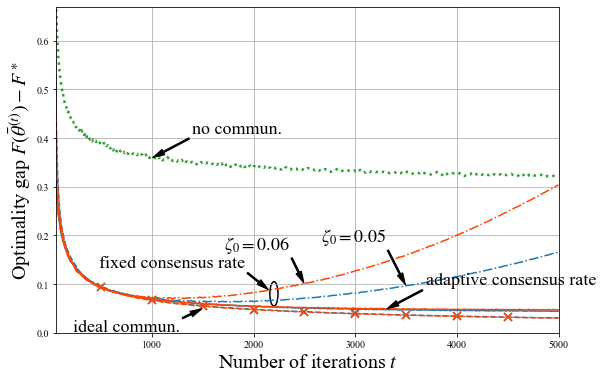

In [30]:
# Originally generated curves
opt = 0.42
losseses = pickle.load( open('../repo_jv/data/simulations/losseses_SCHEME_1_a_200.00_zeta0_0.0500_torus.pkl', 'rb') )
losseses = np.array(losseses[1]) - opt
K = losseses.shape[1]
df0_0 = pd.DataFrame(losseses, columns = ['Device_{}'.format(i + 1) for i in range(K)] )

losseses = pickle.load( open('../repo_jv/data/simulations/losseses_SCHEME_1_a_200.00_zeta0_0.0600_torus.pkl', 'rb') )
losseses = np.array(losseses[1]) - opt
K = losseses.shape[1]
df0_2 = pd.DataFrame(losseses, columns = ['Device_{}'.format(i + 1) for i in range(K)] )

losseses = pickle.load( open('../repo_jv/data/simulations/losseses_SCHEME_6_P_0.0002mW_N_7943_a_200.00_zeta0_0.0500(no_decay)_a_prime_1000.00_2-D_torus.pkl', 'rb') )
losseses = np.array(losseses) - opt
K = losseses.shape[2]
df1_0 = pd.DataFrame(losseses[0], columns = ['Device_{}'.format(i + 1) for i in range(K)] )

losseses = pickle.load( open('../repo_jv/data/simulations/losseses_SCHEME_6_P_0.0002mW_N_7943_a_200.00_zeta0_0.0500_a_prime_1000.00_2-D_torus.pkl', 'rb') )
losseses = np.array(losseses) - opt
df2_0 = pd.DataFrame(losseses[0], columns = ['Device_{}'.format(i + 1) for i in range(K)] )

# Newly added curves for analog schemes with constant cr
losseses = pickle.load( open('../repo_jv/data/simulations/losseses_SCHEME_6_P_0.000200mW_N_7943_a_200.00_zeta0_0.0200(no_decay)_a_prime_1000.00_torus_n-1.pkl', 'rb') )
losseses = np.array(losseses) - opt 
df1_1 = pd.DataFrame(losseses)

losseses = pickle.load( open('../repo_jv/data/simulations/losseses_SCHEME_6_P_0.000200mW_N_7943_a_200.00_zeta0_0.0600(no_decay)_a_prime_1000.00_torus_n-1.pkl', 'rb') )
losseses = np.array(losseses[1]) - opt
df1_2 = pd.DataFrame(losseses, columns = ['Device_{}'.format(i + 1) for i in range(K)] )

losseses = pickle.load( open('../repo_jv/data/simulations/losseses_SCHEME_6_P_0.000200mW_N_7943_a_200.00_zeta0_0.0700(no_decay)_a_prime_1000.00_torus_n-1.pkl', 'rb') )
losseses = np.array(losseses[1]) - opt
df1_3 = pd.DataFrame(losseses, columns = ['Device_{}'.format(i + 1) for i in range(K)] )

# Newly added curves for analog schemes with decaying cr
losseses = pickle.load( open('../repo_jv/data/simulations/losseses_SCHEME_6_P_0.000200mW_N_7943_a_200.00_zeta0_0.0200_a_prime_1000.00_torus_n-1.pkl', 'rb') )
losseses = np.array(losseses[1]) - opt 
df2_1 = pd.DataFrame(losseses, columns = ['Device_{}'.format(i + 1) for i in range(K)] )

losseses = pickle.load( open('../repo_jv/data/simulations/losseses_SCHEME_6_P_0.000200mW_N_7943_a_200.00_zeta0_0.0600_a_prime_1000.00_torus_n-1.pkl', 'rb') )
losseses = np.array(losseses[1]) - opt
df2_2 = pd.DataFrame(losseses, columns = ['Device_{}'.format(i + 1) for i in range(K)] )

losseses = pickle.load( open('../repo_jv/data/simulations/losseses_SCHEME_6_P_0.000200mW_N_7943_a_200.00_zeta0_0.0700_a_prime_1000.00_torus_n-1.pkl', 'rb') )
losseses = np.array(losseses[1]) - opt
df2_3 = pd.DataFrame(losseses, columns = ['Device_{}'.format(i + 1) for i in range(K)] )

losseses = pickle.load( open('../repo_jv/data/simulations/losseses_local_a_200.00.pkl', 'rb') )
losseses = np.array(losseses) - opt
df8 = pd.DataFrame(losseses[0], columns = ['Device_{}'.format(i + 1) for i in range(K)] )


plt.rc('font', family='Times New Roman')
mpl.rcParams["mathtext.fontset"] = 'stix'
fig, ax = plt.subplots(figsize = (9.0,6.0))
df0_0.rolling(window = 49).mean().mean(axis = 1).plot(style = '--', marker = 'x', fillstyle = 'none', ms = 8, mew = 1.5, markevery = 500, label = r'ideal commun. (constant consensus rate $\zeta^{(t)}=\zeta_0$)')
df1_0.rolling(window = 19).mean().mean(axis = 1).plot(style = '-.', color = 'C0', label = r'analog (constant consensus rate $\zeta^{(t)}=\zeta_0$)')
df2_0.rolling(window = 19).mean().mean(axis = 1).plot(color = 'C0', label = r'analog (adaptive consensus rate $\zeta^{(t)}=\frac{\zeta_0}{t/1000+1}$)')
# df1_1.rolling(window = 29).mean().mean(axis = 1).plot(style = '-.', color = 'orangered', label = r'Constant $\zeta^{(t)}=0.02$')
# df2_1.rolling(window = 29).mean().mean(axis = 1).plot(color = 'orangered', label = r'Adaptive $\zeta^{(t)}=\frac{0.02}{t/1000+1}$')
df0_2.rolling(window = 49).mean().mean(axis = 1).plot(style = '--', color = 'orangered', marker = 'x', fillstyle = 'none', ms = 8, mew = 1.5, markevery = 500, label = r'')
df1_2.rolling(window = 19).mean().mean(axis = 1).plot(style = '-.', color = 'orangered', label='')
df2_2.rolling(window = 19).mean().mean(axis = 1).plot(color = 'orangered', label = '')
# df1_3.rolling(window = 29).mean().mean(axis = 1).plot(style = '-.', color = 'saddlebrown', label = r'Constant $\zeta^{(t)}=0.07$')
# df2_3.rolling(window = 29).mean().mean(axis = 1).plot(color = 'saddlebrown', label = r'Adaptive $\zeta^{(t)}=\frac{0.07}{t/1000+1}$')
df8.rolling(window = 49).mean().mean(axis = 1).plot(style = ":", lw = 2.5, color = 'tab:green', label = 'no commun.')

plt.xlabel(r'Number of iterations $t$', fontsize = 20)
plt.ylabel(r'Optimality gap $F(\bar{\theta}^{(t)})-F^\ast$', fontsize = 20)
# plt.title(r'ER graph with $p = 0.2$ and $\barP = -57$dBm', fontsize = 14)
plt.xlim((60, 5000))
plt.ylim((0, 0.67))
plt.grid()

# # Place legend for individual curves
# plt.legend(loc = 'upper right', fontsize = 16)
# Place marks using annotation
from matplotlib.patches import Ellipse
el = Ellipse((2200, 0.08), 80, 0.05, angle = 0, fill = False, lw = 1.5)
ax.add_artist(el)
_ = ax.annotate(r'$\zeta_0 = 0.06$',
            xy = (2500, .100), xycoords = 'data',
            xytext = (-80, 35), textcoords = 'offset points', fontsize = 18,
            arrowprops=dict(facecolor = 'black', width = 1.5, headwidth = 6, shrink = 0.03))
_ = ax.annotate(r'$\zeta_0 = 0.05$',
            xy = (3500, .096), xycoords = 'data',
            xytext = (-85, 45), textcoords = 'offset points', fontsize = 18,
            arrowprops=dict(facecolor = 'black', width = 1.5, headwidth = 6, shrink = 0.03))
_ = ax.annotate(r'ideal commun.',
            xy = (1500, .05), xycoords = 'data',
            xytext = (-130, -23), textcoords = 'offset points', fontsize = 18,
            arrowprops=dict(facecolor = 'black', width = 1.5, headwidth = 6, shrink = 0.03))
_ = ax.annotate(r'adaptive consensus rate',
            xy = (3300, .048), xycoords = 'data',
            xytext = (40, 25), textcoords = 'offset points', fontsize = 18,
            arrowprops=dict(facecolor = 'black', width = 1.5, headwidth = 6, shrink = 0.03))
_ = ax.annotate(r'fixed consensus rate',
            xy = (2150, .088), xycoords = 'data',
            xytext = (-170, 23), textcoords = 'offset points', fontsize = 18,
            arrowprops=dict(facecolor = 'black', width = 1.5, headwidth = 6, shrink = 0.02))
_ = ax.annotate(r'no commun.',
            xy = (1000, .359), xycoords = 'data',
            xytext = (40, 25), textcoords = 'offset points', fontsize = 18,
            arrowprops=dict(facecolor = 'black', width = 1.5, headwidth = 6, shrink = 0.02))

# _ = plt.savefig('C:/Users/Helen/Documents/visiting_research@KCL/D2D_DSGD/XXX20-FL_over_D2D/eps/comparison_for_og_const_vs_adapt_cr.eps',format='eps', dpi=600)
plt.show()

In [57]:
df1_0.rolling(window = 49).mean().mean(axis = 1)[2200]

0.0665662091848789

In [58]:
df1_2.rolling(window = 49).mean().mean(axis = 1)[2200]

0.08865818143499013

In [10]:
35 * 1.25

43.75